## STEP1: FIND THE DATASET AND DOWNLOAD AS CSV FILE


## STEP2: READ THE CSV FILE BY USE OF PANDAS AND USE DATAFRAME TO STORE DATASET AS TABLE FORMAT


In [12]:
import pandas as pd 
df=pd.read_csv('data\sales.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## STEP3: PERFORM EDA TO FIND THE STATISTICS, NULL VALUES, REMOVE DUPLICATES AND MANY MORE

In [14]:
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [15]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [16]:
df=df.drop_duplicates()

In [17]:
df['Date'] = pd.to_datetime(df['Date'])


In [18]:
df['Revenue'] = df['Quantity'] * df['Price per Unit']


In [19]:
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Revenue
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100


In [20]:
df.info()
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Revenue           1000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 85.9+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Revenue
18,19,2023-09-16,CUST019,Female,62,Clothing,2,25,50,50
606,607,2023-03-17,CUST607,Male,54,Clothing,3,25,75,75
766,767,2023-10-24,CUST767,Male,39,Beauty,3,25,75,75
94,95,2023-11-24,CUST095,Female,32,Clothing,2,30,60,60
201,202,2023-03-26,CUST202,Female,34,Clothing,4,300,1200,1200


In [21]:
df.info()

df.describe()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Revenue           1000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 85.9+ KB


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Revenue             0
dtype: int64

## STEP4: SQL-style business insights

In [22]:
revenue_by_category = df.groupby('Product Category')['Revenue'].sum().sort_values(ascending=False)
print(revenue_by_category)


Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Revenue, dtype: int64


In [23]:
top_products = df.groupby(['Product Category', 'Customer ID'])['Revenue'].sum().reset_index()
top_products['Rank'] = top_products.groupby('Product Category')['Revenue'].rank(method='first', ascending=False)
top3 = top_products[top_products['Rank'] <= 3]
top3.head(10)


,Product Category,Customer ID,Revenue,Rank
27,Beauty,CUST074,2000,1.0
33,Beauty,CUST093,2000,2.0
46,Beauty,CUST139,2000,3.0
347,Clothing,CUST124,2000,1.0
366,Clothing,CUST166,2000,2.0
397,Clothing,CUST253,2000,3.0
662,Electronics,CUST015,2000,1.0
675,Electronics,CUST065,2000,2.0
678,Electronics,CUST072,2000,3.0


In [24]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()
monthly_revenue.head()


,Month,Revenue
0,2023-01,35450
1,2023-02,44060
2,2023-03,28990
3,2023-04,33870
4,2023-05,53150


In [25]:
customer_revenue = df.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False)
customer_revenue.head(10)


Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
CUST089    2000
CUST946    2000
CUST157    2000
CUST155    2000
CUST420    2000
Name: Revenue, dtype: int64

In [27]:
revenue_by_category.to_csv('output_revenue_by_category.csv')
monthly_revenue.to_csv('output_monthly_revenue.csv')
top3.to_csv('output_top3_products.csv')



## STEP 5 — “Customer & Product Performance Insights”

In [29]:
customer_summary = df.groupby('Customer ID').agg({
    'Revenue': 'sum',
    'Transaction ID': 'count'
}).rename(columns={
    'Revenue': 'Total Revenue',
    'Transaction ID': 'Total Orders'
}).reset_index()

customer_summary.sort_values('Total Revenue', ascending=False).head(10)


,Customer ID,Total Revenue,Total Orders
487,CUST487,2000,1
476,CUST476,2000,1
773,CUST773,2000,1
503,CUST503,2000,1
92,CUST093,2000,1
88,CUST089,2000,1
946,CUST946,2000,1
157,CUST157,2000,1
155,CUST155,2000,1
420,CUST420,2000,1


In [30]:
product_summary = df.groupby('Product Category').agg({
    'Total Amount': 'sum',
    'Transaction ID': 'count'
}).rename(columns={
    'Total Amount': 'Total Revenue',
    'Transaction ID': 'Total Orders'
}).reset_index()

product_summary.sort_values('Total Revenue', ascending=False).head(10)



,Product Category,Total Revenue,Total Orders
2,Electronics,156905,342
1,Clothing,155580,351
0,Beauty,143515,307


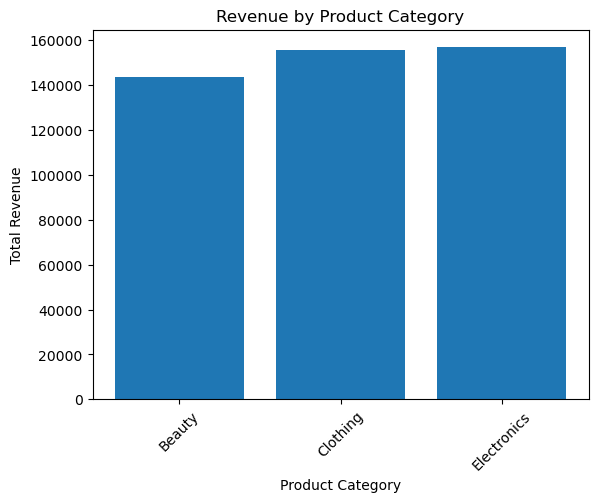

In [31]:
import matplotlib.pyplot as plt

plt.bar(product_summary['Product Category'], product_summary['Total Revenue'])
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()
